# <b>Second Question <b>

In [5]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

# Matrix from previous question
A = np.matrix([[0, 1, 0, 1, 0, 0, 1],
                [1, 0, 1, 0, 1, 0, 0],
                [0, 1, 0, 0, 0, 1, 0],
                [1, 0, 0, 0, 0, 0, 1],
                [0, 1, 0, 0, 0, 1, 1],
                [0, 0, 1, 0, 1, 0, 1],
                [1, 0, 0, 1, 1, 1, 0]])

<b>1. Create 10 random graphs and compare highest degree of the graph with the highest eigenvalue of the adjacency matrix. <br>Is there a relation between them?<b>

In [6]:
from math import comb
a = np.zeros((10))

for _ in range(10):
    nn = np.random.randint(low=5, high=100)
    ne = np.random.randint(low=1, high=(nn*(nn-1))/2)
    G = nx.dense_gnm_random_graph(n=nn, m=ne)
    max_degree = max(dict(G.degree()), key=dict(G.degree()).get)
    A = nx.adjacency_matrix(G).todense()
    EV, _ = np.linalg.eig(A)
    print(max(EV), max_degree)
    


47.1267815270479 26
90.18968472851786 2
1.6180339887498936 0
14.069290332507823 33
52.29668739053746 39
10.006412083056265 33
70.01799110345259 23
35.64347029967135 31
11.691545743145491 20
10.148376895604486 9


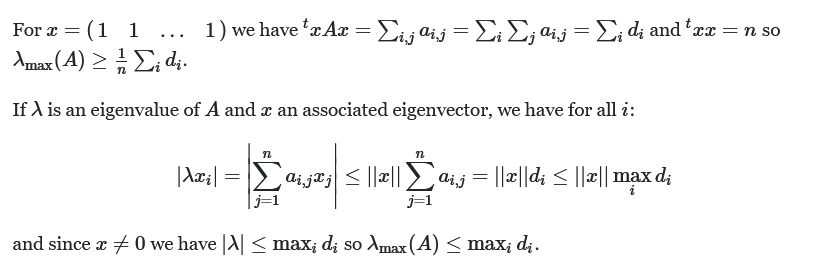
[source](https://math.stackexchange.com/questions/107155/relationship-between-eigenvalue-and-degree)

<b>2. Create 10 random bipartite graphs and compare eigenvalues of the adjacency matrix of each graph, is there a relation between them?

In [24]:
for _ in range(10):
    n = np.random.randint(low=5, high=100)
    m = np.random.randint(low=5, high=100)
    G2 = nx.bipartite.random_graph(n,m, np.random.random())
    adj = nx.adjacency_matrix(G2).todense()
    eig_val, _ = np.linalg.eig(adj)
    max_ev = max(eig_val)
    print(f"if k = maximum eigenvalue {max(eig_val)} then -k is also an eigenvalue {min(eig_val)}")
    

if k = maximum eigenvalue (10.247576806199794+0j) then -k is also an eigenvalue (-10.247576806199778+0j)
if k = maximum eigenvalue (6.515064737817996+0j) then -k is also an eigenvalue (-6.5150647378179904+0j)
if k = maximum eigenvalue (8.736339002587236+0j) then -k is also an eigenvalue (-8.736339002587231+0j)
if k = maximum eigenvalue 25.108396839165092 then -k is also an eigenvalue -25.108396839165096
if k = maximum eigenvalue (6.6536569790560165+0j) then -k is also an eigenvalue (-6.653656979056019+0j)
if k = maximum eigenvalue (37.700607391256945+0j) then -k is also an eigenvalue (-37.700607391256945+0j)
if k = maximum eigenvalue 43.99854194215868 then -k is also an eigenvalue -43.99854194215869
if k = maximum eigenvalue (15.590384144086878+0j) then -k is also an eigenvalue (-15.590384144086856+0j)
if k = maximum eigenvalue (10.728415415853538+0j) then -k is also an eigenvalue (-10.728415415853556+0j)
if k = maximum eigenvalue (2.698413202898298+0j) then -k is also an eigenvalue (-

<b>3. Find a way to calculate paths with length n from vertices i to j then find number of paths with length 3 in first questions graph.<b> <br>


according to this [page](https://math.stackexchange.com/questions/602207/finding-number-of-paths-between-vertices-in-a-graph) then number of paths with length n from vertices i to j equals the (i,j)th entry of A<sup>n</sup>

In [33]:
A3 = np.linalg.matrix_power(A,3)
print("number of paths with len 3 in first questions graph:",np.sum(A3) + np.trace(A3) / 2)

number of paths with len 3 in first questions graph: 184.0


<b>4. Find number of triangles in a graph, then count number of the triangle in the first questions graph.

We just need to compute the paths with len 3 start and end in a single node ([Sum of diagonal elements in A3 divided by 6](https://stackoverflow.com/questions/17740081/given-an-nxn-adjacency-matrix-how-can-one-compute-the-number-of-triangles-in-th))

In [37]:
print("number of triangles in first question:", np.trace(A3)/6)

number of triangles in first question: 2.0


<b>5.Find a way to count squares in an undirected graph, then count the number of sqaures in first questions adjacency matrix.<b>

In [81]:
from math import comb

degrees = np.sum(A, axis=1)
not_squares = 0
for degree in degrees:
    not_squares += comb(degree.item(), 2)
    not_squares += degree.item()
not_squares


40

In [82]:
A2 = np.linalg.matrix_power(A,2)
not_squares += (np.sum(A) - np.trace(A))/2
not_squares

50.0

In [86]:
A4 = np.linalg.matrix_power(A,4)
np.trace(A4)-not_squares
A4

matrix([[17,  5, 10,  9, 17, 10, 12],
        [ 5, 18,  2,  9,  5, 15, 17],
        [10,  2, 10,  4, 13,  4,  9],
        [ 9,  9,  4,  9,  9, 10, 11],
        [17,  5, 13,  9, 20, 10, 13],
        [10, 15,  4, 10, 10, 17, 14],
        [12, 17,  9, 11, 13, 14, 25]])

In [85]:
66/8

8.25

**6. Consider these two graphs, is there a relation between them? calculate PA<sub>1</sub>P<sup>-1</sup> and compare that to A<sub>2</sub> what's your conclusion?**
<img src="images/2.6.png" alt="drawing" width="500"/> <br>

In [39]:
G1_edges = [(1,3), (1,4), (2,4), (2,5), (3,1), (3,5), (4,2), (4,1), (5,3), (5,2)]
G2_edges = [(1,2), (1,5), (2,1), (2,3), (3,2), (3,4), (4,3), (4,5), (5,4), (5,1)]

G1 = nx.Graph()
G2 = nx.Graph()
G1.add_edges_from(G1_edges)
G2.add_edges_from(G2_edges)

A1 = nx.adjacency_matrix(G1).todense()
A2 = nx.adjacency_matrix(G2).todense()
P = np.matrix([[1, 0, 0, 0, 0],
               [0, 0, 0, 1, 0],
               [0, 1, 0, 0, 0],
               [0, 0, 0, 0, 1],
               [0, 0, 1, 0, 0]], dtype=np.int32)

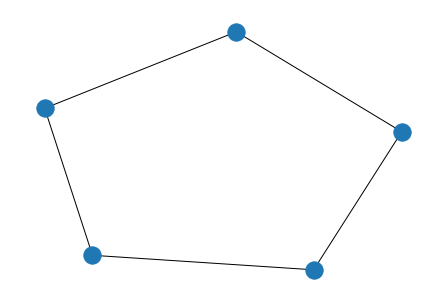

In [50]:
nx.draw(G1)

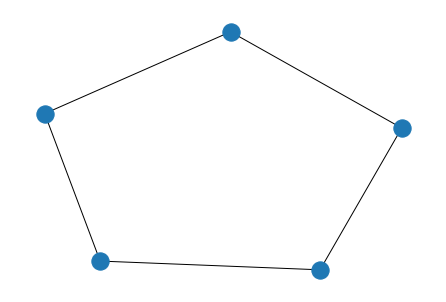

In [58]:
nx.draw(G2)

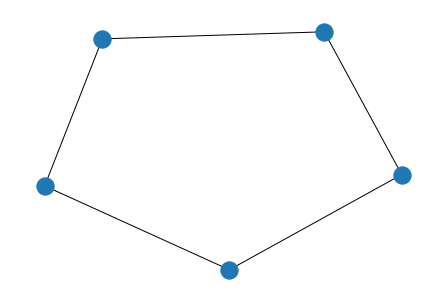

In [57]:
# P is Permutation matrix so P.Transpose = P.inverse
M = np.dot(np.dot(P,A1), P.T)
nx.draw(nx.from_numpy_matrix(M))

We can see that these 3 Matrices (A1, A2, PA1P.T) construct 3 graphs that are isomorphic.